<a href="https://colab.research.google.com/github/jiyoonlim/fast.ai/blob/master/jiyoon_v3_1_lesson2_download.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating your own dataset from Google Images

*by: Francisco Ingham and Jeremy Howard. Inspired by [Adrian Rosebrock](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)*

## Lesson 2 - Notes

[from hiromis](https://github.com/hiromis/notes/blob/master/Lesson2.md)

[from poonav](https://forums.fast.ai/t/deep-learning-lesson-2-notes)

[discussion thread](https://forums.fast.ai/t/lesson-2-discussion)

[video timeline](https://forums.fast.ai/t/lesson-2-official-resources-and-updates/28630)

[fastai-doc](https://docs.fast.ai/)


In this tutorial we will see how to easily create an image dataset through Google Images. **Note**: You will have to repeat these steps for any new category you want to Google (e.g once for dogs and once for cats).

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate


## Get a list of URLs

### Search and scroll

Go to [Google Images](http://images.google.com) and search for the images you are interested in. The more specific you are in your Google Search, the better the results and the less manual pruning you will have to do.

Scroll down until you've seen all the images you want to download, or until you see a button that says 'Show more results'. All the images you scrolled past are now available to download. To get more, click on the button, and continue scrolling. The maximum number of images Google Images shows is 700.

It is a good idea to put things you want to exclude into the search query, for instance if you are searching for the Eurasian wolf, "canis lupus lupus", it might be a good idea to exclude other variants:

    "canis lupus lupus" -dog -arctos -familiaris -baileyi -occidentalis

You can also limit your results to show only photos by clicking on Tools and selecting Photos from the Type dropdown.

### Download into file

Now you must run some Javascript code in your browser which will save the URLs of all the images you want for you dataset.

Press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>J</kbd> in Windows/Linux and <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>J</kbd> in Mac, and a small window the javascript 'Console' will appear. That is where you will paste the JavaScript commands.

You will need to get the urls of each of the images. You can do this by running the following commands:

```javascript
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

### Create directory and upload urls file into your server

Choose an appropriate name for your labeled images. You can run these steps multiple times to grab different labels.

In [0]:
folder = 'flatfish'
file = 'flatfish.csv'

In [0]:
folder = 'flounder'
file = 'flounder.csv'

content/sample_data

In [0]:
folder = 'halibut'
file = 'halibut.csv'

You will need to run this line once per each category.

In [0]:
path = Path('/content/data/fish')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
!cd /content/data/fish
#!rmdir /content/data/bears/teddys

In [6]:
path.ls()

[PosixPath('/content/data/fish/flatfish')]

Finally, upload your urls file. You just need to press 'Upload' in your working directory and select your file, then click 'Upload' for each of the displayed files.

![uploaded file](images/download_images/upload.png)

## Download images

Now you will need to download you images from their respective urls.

fast.ai has a function that allows you to do just that. You just have to specify the urls filename and the destination folder and this function will download and save all images that can be opened. If they have some problem in being opened, they will not be saved.

Let's download our images! Notice you can choose a maximum number of images to be downloaded. In this case we will not download all the urls.

You will need to run this line once for every category.

In [0]:
classes = ['flatfish','flounder','halibut']

In [28]:
path = Path('/content/data/fish')
download_images(path/file, dest, max_pics=200)


Error https://scontent-sjc2-1.cdninstagram.com/t51.2885-15/e35/18298497_838615352968637_3841417499706916864_n.jpg HTTPSConnectionPool(host='scontent-sjc2-1.cdninstagram.com', port=443): Max retries exceeded with url: /t51.2885-15/e35/18298497_838615352968637_3841417499706916864_n.jpg (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7fb37cfc8c18>: Failed to establish a new connection: [Errno -2] Name or service not known',))


In [0]:
# If you have problems download, try with `max_workers=0` to see exceptions:
download_images(path/file, dest, max_pics=20, max_workers=0)

Then we can remove any images that can't be opened:

In [30]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

flatfish


flounder


halibut


cannot identify image file <_io.BufferedReader name='/content/data/fish/halibut/00000031.jpg'>
cannot identify image file <_io.BufferedReader name='/content/data/fish/halibut/00000113.jpg'>
cannot identify image file <_io.BufferedReader name='/content/data/fish/halibut/00000191.jpg'>
cannot identify image file <_io.BufferedReader name='/content/data/fish/halibut/00000030.jpg'>
cannot identify image file <_io.BufferedReader name='/content/data/fish/halibut/00000172.jpg'>
cannot identify image file <_io.BufferedReader name='/content/data/fish/halibut/00000123.jpg'>
cannot identify image file <_io.BufferedReader name='/content/data/fish/halibut/00000183.jpg'>
cannot identify image file <_io.BufferedReader name='/content/data/fish/halibut/00000100.jpg'>
cannot identify image file <_io.BufferedReader name='/content/data/fish/halibut/00000018.jpg'>


## Loading images from a zip file

In [17]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!unzip "/content/gdrive/My Drive/Colab Notebooks/My FastAi Notebooks/dl1/Lesson 2/data/fish.zip"

unzip:  cannot find or open /content/gdrive/My Drive/Colab Notebooks/My FastAi Notebooks/dl1/Lesson 2/data/fish.zip, /content/gdrive/My Drive/Colab Notebooks/My FastAi Notebooks/dl1/Lesson 2/data/fish.zip.zip or /content/gdrive/My Drive/Colab Notebooks/My FastAi Notebooks/dl1/Lesson 2/data/fish.zip.ZIP.


## Saving the bears directory

In [0]:
!zip -r /content/fish.zip /content/data/fish

  adding: content/data/fish/ (stored 0%)
  adding: content/data/fish/halibut/ (stored 0%)
  adding: content/data/fish/halibut/00000019.jpg (deflated 7%)
  adding: content/data/fish/halibut/00000109.jpg (deflated 1%)
  adding: content/data/fish/halibut/00000149.jpg (deflated 1%)
  adding: content/data/fish/halibut/00000193.jpg (deflated 0%)
  adding: content/data/fish/halibut/00000171.png (deflated 0%)
  adding: content/data/fish/halibut/00000057.jpg (deflated 4%)
  adding: content/data/fish/halibut/00000079.jpg (deflated 1%)
  adding: content/data/fish/halibut/00000043.php (deflated 3%)
  adding: content/data/fish/halibut/00000128.jpg (deflated 0%)
  adding: content/data/fish/halibut/00000192.jpg (deflated 0%)
  adding: content/data/fish/halibut/00000167.jpg (deflated 0%)
  adding: content/data/fish/halibut/00000050.JPG (deflated 8%)
  adding: content/data/fish/halibut/00000186.jpg (deflated 1%)
  adding: content/data/fish/halibut/00000070.jpg (deflated 0%)
  adding: content/data/fish/

In [0]:
from google.colab import files
files.download("/content/fish.zip")

## View data

In [0]:
path = Path('content/data/fish/train')

In [24]:
path.ls()

[PosixPath('content/data/fish/train/halibut'),
 PosixPath('content/data/fish/train/flounder'),
 PosixPath('content/data/fish/train/flatfish')]

In [0]:
classes = ['flatfish','flounder','halibut']

In [31]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

flatfish


flounder


halibut


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
# If you already cleaned your data, run this cell instead of the one before
#np.random.seed(42)
#data = ImageDataBunch.from_csv(".", folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
#         ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

Good! Let's take a look at some of our pictures then.

In [33]:
data.classes

['flatfish', 'flounder', 'halibut']

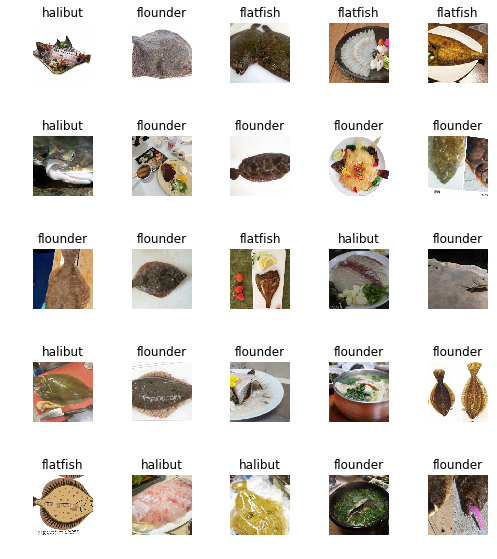

In [34]:
data.show_batch(rows=5, figsize=(7,8))

In [35]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['flatfish', 'flounder', 'halibut'], 3, 455, 113)

## Train model

In [36]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:00, 133908469.09it/s]


NOTE:  `metrics=error_rate` metrics are always apply to the validation set.

In [37]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.274971,1.208320,0.610619,00:09
1,1.092898,1.136305,0.460177,00:07
2,0.947028,1.088339,0.407080,00:08
3,0.868061,1.051839,0.389381,00:08


## Interpreting the Results

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [0]:
losses, idxs = interp.top_losses()

In [41]:
len(data.valid_ds) == len(losses) == len(idxs)

True

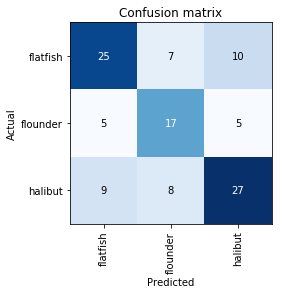

In [42]:
interp.plot_confusion_matrix()

In [43]:
interp.most_confused(min_val=2)

[('flatfish', 'halibut', 10),
 ('halibut', 'flatfish', 9),
 ('halibut', 'flounder', 8),
 ('flatfish', 'flounder', 7),
 ('flounder', 'flatfish', 5),
 ('flounder', 'halibut', 5)]

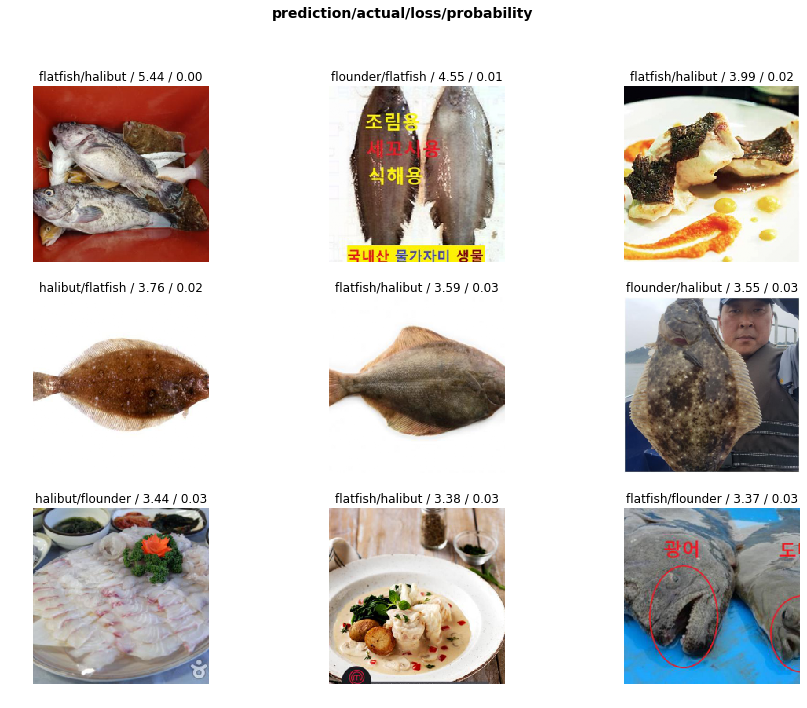

In [44]:
interp.plot_top_losses(9, figsize=(15,11), heatmap=False)

## Inference

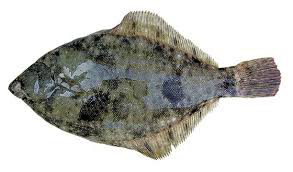

In [45]:
img = open_image('/content/sample_data/flounder1.jpeg')
img

In [46]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category flounder

In [0]:
learn.save('/content/sample_data/stage-1')

## Fine Tuning

In [0]:
learn.unfreeze()

In [49]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


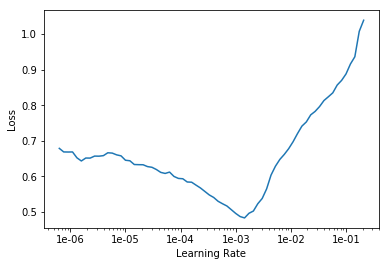

In [50]:
learn.recorder.plot()

In [51]:
learn.fit_one_cycle(2, max_lr=slice(3e-5, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.645329,1.044906,0.389381,00:07
1,0.571966,1.046599,0.371681,00:07


NOTE:  So you can see, I picked `3e-5` for my bottom learning rate. For my top learning rate, I normally pick 1`e-4` or `3e-4`, it's kind of like I don't really think about it too much. That's a rule of thumb﹣it always works pretty well. One of the things you'll realize is that most of these parameters don't actually matter that much in detail. If you just copy the numbers that I use each time, the vast majority of the time, it'll just work fine. And we'll see places where it doesn't today.


NOTE: Default LR:   We found that `3e-3` is just a really good default learning rate. It works most of the time for your initial fine-tuning before you unfreeze. And then, I tend to kind of just multiply from there. So then the next stage, I will pick 10 times lower than that for the second part of the slice, and whatever the LR finder found for the first part of the slice. **The second part of the slice doesn't come from the LR finder. It's just a rule of thumb which is 10 times less than your first part which defaults to 3e-3, and then the first part of the slice is what comes out of the LR finder. **

We'll be learning a lot more about these learning rate details both today and in the coming lessons. But for now, all you need to remember is that your basic approach looks like this:

- learn.fit_one_cycle
- Some number of epochs, I often pick 4
- Some learning rate which defaults to 3e-3. I'll just type it up fully so you can see.
- Then we do that for a bit and then we unfreeze it.
- Then we learn some more and so this is a bit where I just take whatever I did last time and divide it by 10. 
- Then I also write like that (slice) then I have to put one more number in here and that's the number I get from the learning rate finder﹣a bit where it's got the strongest slope.

In [0]:
learn.save('/content/sample_data/stage-2')

## Interpretation

In [0]:
learn.load('/content/sample_data/stage-2');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

NOTE:  confusion matrix on the validation set.

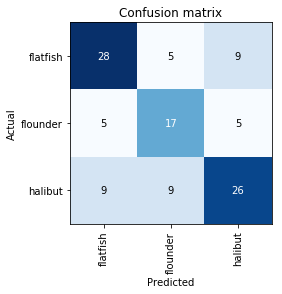

In [56]:
interp.plot_confusion_matrix()

In [57]:
interp.most_confused(min_val=2)

[('flatfish', 'halibut', 9),
 ('halibut', 'flatfish', 9),
 ('halibut', 'flounder', 9),
 ('flatfish', 'flounder', 5),
 ('flounder', 'flatfish', 5),
 ('flounder', 'halibut', 5)]

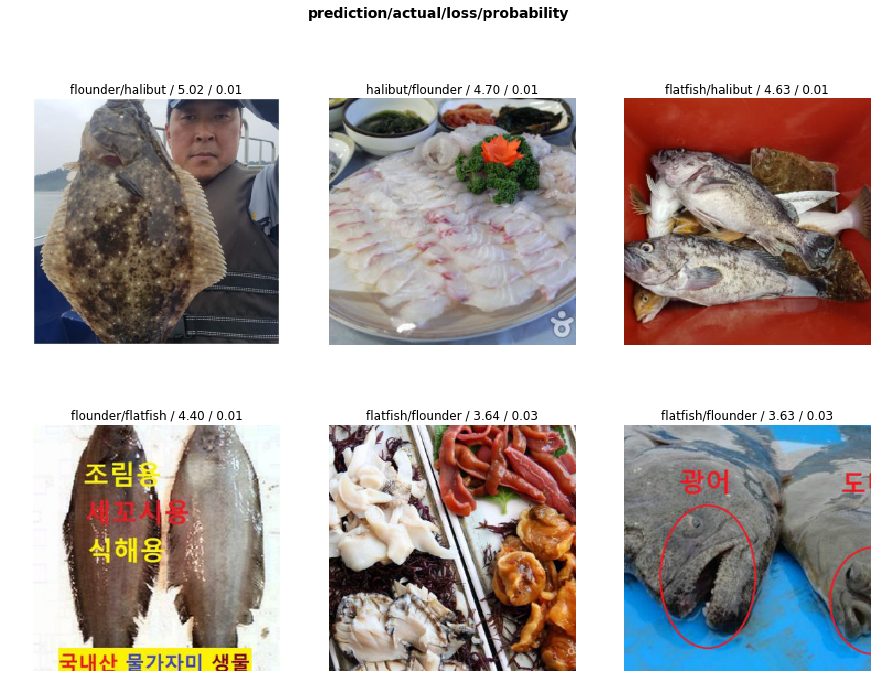

In [58]:
interp.plot_top_losses(6, figsize=(15,11), heatmap=False)

NOTE: most_confused() function will simply grab out from the confusion matrix the most confused combinations of predicted and actual categories, that it got wrong most often.

Example: ('grizzly', 'teddys', 26),

actual: grizzly
prediction: teddys
this wrong combination (actual v.s. prediction ) happened 26 times.

## Cleaning Up

Some of our top losses aren't due to bad performance by our model. There are images in our data set that shouldn't be.

Using the `ImageCleaner` widget from `fastai.widgets` we can prune our top losses, removing photos that don't belong.

In [0]:
from fastai.widgets import *
losses, idxs = interp.top_losses()
top_loss_paths = data.valid.ds.x(idxs)


NOTE1:  `.top_losses` return 3 things: 
1. the losses of the things that were the worst
2. the indexes into the dataset of the things that were the worst.
3. the dataset. If you do not pass anything at all, it will return the entire dataset but sorted with the highest losses on top.

Every dataset in fast.ai has an x and a y.
- x contains the things that are used, in our case the images, actually the image file name.
- y contains the labels.

So if we grab the indexes and pass them into the data set x, this is going to give us the file names order with the top losses from the validation set; that is which ones it was either confident and wrong about or not confident about.

NOTE2:  You need to re-run this step for the training set as well to clean up the noise out of that data set.

NOTE3:  If you have a test set, you should repeat this step as well. 

First we need to get the file paths from our top_losses. We can do this with `.from_toplosses`. We then feed the top losses indexes and corresponding dataset to `ImageCleaner`.

Notice that the widget will not delete images directly from disk but it will create a new csv file `cleaned.csv` from where you can create a new ImageDataBunch with the corrected labels to continue training your model.

In [0]:
# FileDeleter has been renamed by ImageCleaner
#fd = FileDeleter(file_paths=top_loss_paths)
fd = ImageCleaner(ds, idxs, path)

`ImageCleaner` is our widget to clean up mislabeled  images or images that should not be there.  Delete the images that are wrong, confirm and retrain your model.

Check the `ImageCleaner` source code to see how the widget was done.
Google ipywidget to understand the framework.  A complete GUI environment. 

NOTE:  Flag photos for deletion by clicking 'Delete'. Then click 'Next Batch' to delete flagged photos and keep the rest in that row. ImageCleaner will show you a new row of images until there are no more to show. In this case, the widget will show you images until there are none left from top_losses.ImageCleaner(ds, idxs)

You can also find duplicates in your dataset and delete them! To do this, you need to run .from_similars to get the potential duplicates' ids and then run ImageCleaner with duplicates=True. The API works in a similar way as with misclassified images: just choose the ones you want to delete and click 'Next Batch' until there are no more images left.

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Valid)

In [0]:
ImageCleaner(ds, idxs)

'No images to show :)'

Flag photos for deletion by clicking 'Delete'. Then click 'Next Batch' to delete flagged photos and keep the rest in that row. `ImageCleaner` will show you a new row of images until there are no more to show. In this case, the widget will show you images until there are none left from `top_losses.ImageCleaner(ds, idxs)`

You can also find duplicates in your dataset and delete them! To do this, you need to run `.from_similars` to get the potential duplicates' ids and then run `ImageCleaner` with `duplicates=True`. The API works in a similar way as with misclassified images: just choose the ones you want to delete and click 'Next Batch' until there are no more images left.

In [0]:
ds, idxs = DatasetFormatter().from_similars(learn, ds_type=DatasetType.Valid)

Getting activations...


Computing similarities...


In [0]:
ImageCleaner(ds, idxs, duplicates=True)

'No images to show :)'

Remember to recreate your ImageDataBunch from your `cleaned.csv` to include the changes you made in your data!

## Putting your model in production
Know your classes first.

In [0]:
data.classes

First thing first, let's export the content of our `Learner` object for production:

In [0]:
learn.export()

This will create a file named 'export.pkl' in the directory where we were working that contains everything we need to deploy our model (the model, the weights but also some metadata like the classes or the transforms/normalization used).

You probably want to use CPU for inference, except at massive scale (and you almost certainly don't need to train in real-time). If you don't have a GPU that happens automatically. You can test your model on CPU like so:

In [0]:
#defaults.device = torch.device('cpu')

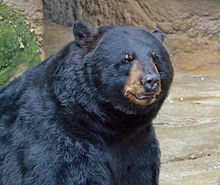

In [0]:
img = open_image(path/'black'/'00000021.jpg')
img

In you web app, open the image to let it check if the bear is a nice bear to cuddle (i.e.: teddy bear!)

In [0]:
classes = ['black', 'grizzly', 'teddys']
data2 = ImageDataBunch.single_fron_classes(path, classes, tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)
learn = create_cnn(data, models.resnet34)
learn.load('stage-2')

NOTE:  the databuch does not have any data.   The new databunch, data2, is just passing one single image at a time. The only reason we include a path is so that it knows where to load that model from.  Do these only once, when your webapp is starting up, it will take .1 of a second to run this code.

We create our `Learner` in production enviromnent like this, jsut make sure that `path` contains the file 'export.pkl' from before.

In [0]:
#learn = load_learner(path)

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category black

then you just execute `learn.predict(imag)` which will return the predicted class, its index and its output.
And lucky we did that, it returns a black bear not a teddy bear!. No cuddle please!

### How does this look like in production?  
Base on Simon Willison contribution regarding his DL on cougar-or-not cougar, you can create something similar. S ([thanks](https://github.com/simonw/cougar-or-not) .  See sample below for his code.
```python
@app.route("/classify-url", methods=["GET"])
async def classify_url(request):
    bytes = await get_bytes(request.query_params["url"])
    img = open_image(BytesIO(bytes))
    _,_,losses = learner.predict(img)
    return JSONResponse({
        "predictions": sorted(
            zip(cat_learner.data.classes, map(float, losses)),
            key=lambda p: p[1],
            reverse=True
        )
    })
```

(This example is for the [Starlette](https://www.starlette.io/) web app toolkit.)

NOTE:  
1. you create a route as usual with a web app, indicate that is async so that it does not take all the machine procs while it is waiting for the response. 
2. Then you open your image, you call `learner.predict(img)` and you return that response.
3. then you can use javascript client or whatever to show it.

and that's it, this is basically the main content of your web app.

You can use Python Anywhere for free hosting for instance.

###  Building a web app for the computer vision model

####  Examples

[Web app example - 1](https://dl-demo.now.sh/)

[Web app example - 2](https://github.com/henripal/maps_webapp)

#### Know How

[Production Starter Kit - Render](https://course.fast.ai/deployment_render.html)

[Deploying on Zeit](https://course.fast.ai/deployment_zeit.html#upload-your-trained-model-file)


[Forume Discussions -  Productionizing models thread](https://forums.fast.ai/t/productionizing-models-thread/28353?u=henripal)

[web app for computer vision model](https://towardsdatascience.com/building-web-app-for-computer-vision-model-deploying-to-production-in-10-minutes-a-detailed-ec6ac52ec7e4)

[lankinen web app](https://medium.com/@lankinen/fastai-model-to-production-this-is-how-you-make-web-app-that-use-your-model-57d8999450cf)

## Things that can go wrong

- Most of the time things will train fine with the defaults
- There's not much you really need to tune (despite what you've heard!)
- Most likely are
  - Learning rate,  too low or too high
  - Number of epochs, too few or too many

### Learning rate (LR) too high

In [0]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [0]:
# learning rate at 0.5
learn.fit_one_cycle(1, max_lr=0.5)

Total time: 00:13
epoch  train_loss  valid_loss  error_rate       
1      12.220007   1144188288.000000  0.765957    (00:13)



We changed the default learning rate from 0.003  to 0.5 really high now!
What happened?  Our validation loss gets very very high.   Normally, we should have something underneath 1.
So, in short, **if your validation loss is really high, your learning rate is much too high.** That's plain and simple.  So, make it lower; and it does not matter how many epochs you do.  And, if this happens, you cannot undo this.  **You need re-create your cnn again and fit from scratch with a lower learning rate.**

### Learning rate (LR) too low

In [0]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

Previously we had this result:

```
Total time: 00:57
epoch  train_loss  valid_loss  error_rate
1      1.030236    0.179226    0.028369    (00:14)
2      0.561508    0.055464    0.014184    (00:13)
3      0.396103    0.053801    0.014184    (00:13)
4      0.316883    0.050197    0.021277    (00:15)
```

Above, it is a copy and paste with a default learning rate (0.003).  So that we can make some comparisons. And with one epoch we were down to a 2 or 3 percent error rate.  

In [0]:
# learning rate at 0.00001
learn.fit_one_cycle(5, max_lr=1e-5)

Total time: 01:07
epoch  train_loss  valid_loss  error_rate
1      1.349151    1.062807    0.609929    (00:13)
2      1.373262    1.045115    0.546099    (00:13)
3      1.346169    1.006288    0.468085    (00:13)
4      1.334486    0.978713    0.453901    (00:13)
5      1.320978    0.978108    0.446809    (00:13)



The default learning rate (0.003) is changed to 0.0001, really low!!!
The error rate gets better but very very slowly! and you can plot it.  See below.


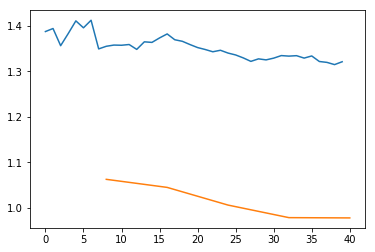

In [0]:
learn.recorder.plot_losses()

You see the plot losses for the training loss (blue line) and the validation loss (orange line), and you can see them gradually going down so slow!
If you see that happening then you have a learning rate that is too low, so bump it up by 10 or bump it up by 100 and try again.

**Also, if your learning rate is too small, your training loss will be higher than your validation loss.**

**NOTE:  You never want a model where your training loss is higher than your validation loss. **  That alwats means you have not fitted enough which means that either your learning rate is too low or your number of epochs is too low. So if you have a model like that, train it some more, or train it with a higher learning rate.

However. as well as taking a really long time, it's getting too many looks at each image, so may overfit.

### Too few epochs

In [0]:
learn = create_cnn(data, models.resnet34, metrics=error_rate, pretrained=False)

In [0]:
# training for 1 epoch.
learn.fit_one_cycle(1)

Total time: 00:14
epoch  train_loss  valid_loss  error_rate
1      0.602823    0.119616    0.049645    (00:14)



When training with few epochs, the error rate is ok less that 5 % but look at the **training loss**!, **it is much higher than the validation loss**.

So too few epochs and too lower learning rate look very similar. So try running more epochs.  It it is taking for ever, you can try a higher learning rate.

And if you try a higher learning rate and the loss goes off to 100 000 million then put back where it was and try a few more epochs,

### Too many epochs

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.9, bs=32, 
        ds_tfms=get_transforms(do_flip=False, max_rotate=0, max_zoom=1, max_lighting=0, max_warp=0
                              ),size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
learn = create_cnn(data, models.resnet50, metrics=error_rate, ps=0, wd=0)
learn.unfreeze()

In [0]:
learn.fit_one_cycle(40, slice(1e-6,1e-4))

Total time: 06:39
epoch  train_loss  valid_loss  error_rate
1      1.513021    1.041628    0.507326    (00:13)
2      1.290093    0.994758    0.443223    (00:09)
3      1.185764    0.936145    0.410256    (00:09)
4      1.117229    0.838402    0.322344    (00:09)
5      1.022635    0.734872    0.252747    (00:09)
6      0.951374    0.627288    0.192308    (00:10)
7      0.916111    0.558621    0.184982    (00:09)
8      0.839068    0.503755    0.177656    (00:09)
9      0.749610    0.433475    0.144689    (00:09)
10     0.678583    0.367560    0.124542    (00:09)
11     0.615280    0.327029    0.100733    (00:10)
12     0.558776    0.298989    0.095238    (00:09)
13     0.518109    0.266998    0.084249    (00:09)
14     0.476290    0.257858    0.084249    (00:09)
15     0.436865    0.227299    0.067766    (00:09)
16     0.457189    0.236593    0.078755    (00:10)
17     0.420905    0.240185    0.080586    (00:10)
18     0.395686    0.255465    0.082418    (00:09)
19     0.373232    0.2

With too many epochs, then you are overfitting.  The model will learn to recognize your specific images  but will not be able to generalize. 
The indication that you are overfitting is as follows, **the error rate improves for a while and then starts to getting worse again**.


However, it is hard to overfit in deep learning! even if you turn off everything such as data augmentation, turn off drop out, turn off weight decay, trying to overfit as much as you can .... 


***NOTE:  Rumors say that If your training loss is lower than your validation loss then you are overfitting. Actually this is absolutely not true.  Any model that is trained correctly will always have trained loss lower than the validation loss. That is not a sign of overfitting, that is not a sign of you doing something wrong, that is the sign that you have done something right. ***


The really sign that you are overfitting is when your error rate is getting worst. Actually, this is a good assessment since your model to have low error.


So as long as your training and your model error is improving, then you are not overfitting.